In [29]:
import uproot
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
path = '/users/wonsang1995/CWDataDir_ver0_Cf_2021_3/v3/comb/FN/'

In [3]:
files = os.listdir(path)

In [4]:
files

['comb.debug.r001519.f00005.root',
 'comb.debug.r001563.f00148.root',
 'comb.debug.r001563.f02252.root',
 'comb.debug.r001563.f03274.root',
 'comb.debug.r001563.f04525.root',
 'comb.debug.r001563.f01249.root',
 'comb.debug.r001563.f02087.root',
 'comb.debug.r001563.f02501.root',
 'comb.debug.r001511.f00048.root',
 'comb.debug.r001563.f02799.root',
 'comb.debug.r001563.f02107.root',
 'comb.debug.r001521.f00003.root',
 'comb.debug.r001563.f04412.root',
 'comb.debug.r001563.f01074.root',
 'comb.debug.r001563.f02783.root',
 'comb.debug.r001522.f00020.root',
 'comb.debug.r001563.f02877.root',
 'comb.debug.r001563.f02060.root',
 'comb.debug.r001563.f00023.root',
 'comb.debug.r001563.f00152.root',
 'comb.debug.r001563.f03611.root',
 'comb.debug.r001563.f01754.root',
 'comb.debug.r001563.f01447.root',
 'comb.debug.r001563.f03153.root',
 'comb.debug.r001563.f00697.root',
 'comb.debug.r001563.f00691.root',
 'comb.debug.r001563.f01640.root',
 'comb.debug.r001563.f00393.root',
 'comb.debug.r001563

In [5]:
energy_all=[]
x_all=[]
y_all=[]
z_all=[]
dT_all = []
dV_all = []

# for i in range(len(files)):
#     if files[i].split('.')[2][3:] == '1563':

#         file = uproot.open(path + files[i])

#         for j in range(len(np.array(file['comTree']['Var1']))):
#             energy = (np.array(file['comTree']['RecoFlux'])/(5200/8))[j]
#             vtx = np.array(file['comTree']['RecoVertex']).T[:,j]
#             dT = np.array(file['comTree']['Var1'])[j]
#             dV = np.array(file['comTree']['Var2'])[j]
#             energy_all.append(energy)
#             x_all.append(vtx[0])
#             y_all.append(vtx[1])
#             z_all.append(vtx[2])
#             dT_all.append(dT)
#             dV_all.append(dV)
for i in range(len(files)):
    if files[i].split('.')[2][3:] == '1563':
        continue

    file = uproot.open(path + files[i])

    for j in range(len(np.array(file['comTree']['Var1']))):
        energy = (np.array(file['comTree']['RecoFlux'])/(5200/8))[j]
        vtx = np.array(file['comTree']['RecoVertex']).T[:,j]
        dT = np.array(file['comTree']['Var1'])[j]
        dV = np.array(file['comTree']['Var2'])[j]
        energy_all.append(energy)
        x_all.append(vtx[0])
        y_all.append(vtx[1])
        z_all.append(vtx[2])
        dT_all.append(dT)
        dV_all.append(dV)


In [6]:
np.array(dV_all)

array([1.22137  , 0.179926 , 0.0522894, ..., 0.280034 , 0.497182 ,
       1.02288  ], dtype=float32)

In [7]:
np.array(dT_all)

array([37824., 11520., 10176., ..., 52320., 94208., 45808.], dtype=float32)

In [25]:
selec = ((np.abs(np.array(z_all)) < 1.25) & (np.array(energy_all) >6) &(np.array(energy_all) < 10))
# selec = ((np.abs(np.array(z_all)) < 1.25) & (np.abs(np.array(x_all)) < 0.5) & (np.abs(np.array(y_all)) < 0.5) & (np.array(energy_all) >3))
# selec = ((np.array(x_all)>-0.05)& (np.array(x_all)<0.05)& (np.array(y_all)>-0.05)& (np.array(y_all)<0.05))
# selec = ((np.array(energy_all) >6) &(np.array(energy_all) < 8))

In [9]:
print(len(np.array(dV_all)))
print(len(np.array(dV_all)[selec]))

31615
8756


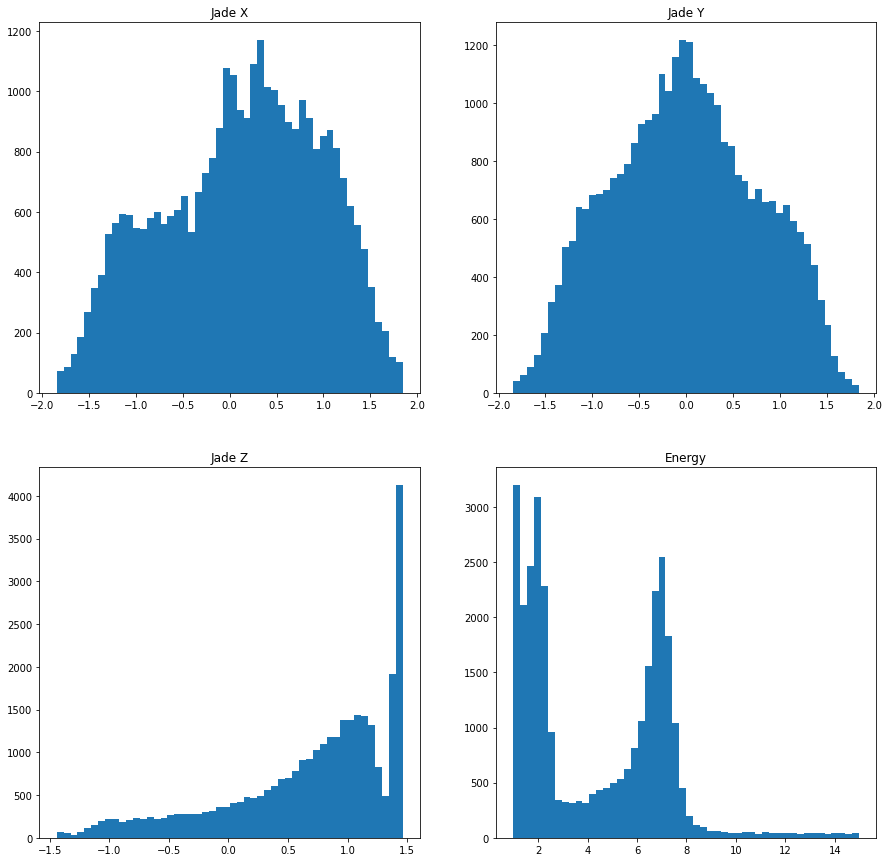

In [10]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(2,2,1)
plt.hist(np.array(x_all),bins=50)
plt.title('Jade X')
# plt.show()
plt.subplot(2,2,2)
plt.hist(np.array(y_all),bins=50)
plt.title('Jade Y')
# plt.show()
plt.subplot(2,2,3)
plt.hist(np.array(z_all),bins=50)
plt.title('Jade Z')
# plt.show()
plt.subplot(2,2,4)
plt.hist(np.array(energy_all),bins=50)
plt.title('Energy')
plt.show()

In [24]:
np.array(x_all)[selec].shape

(2037,)

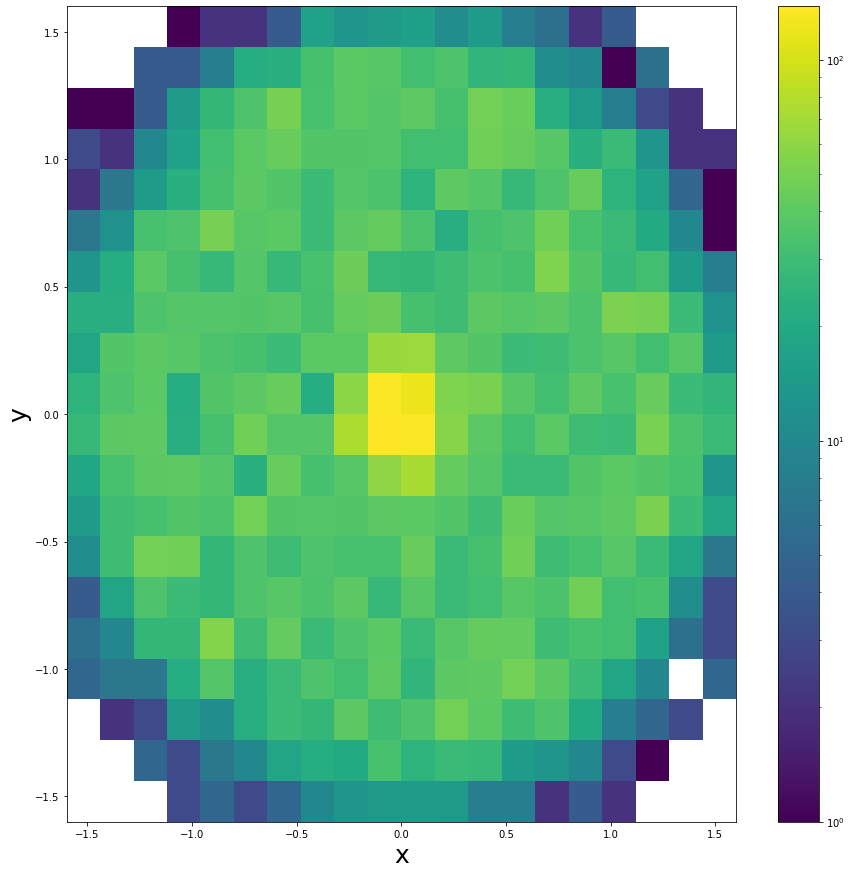

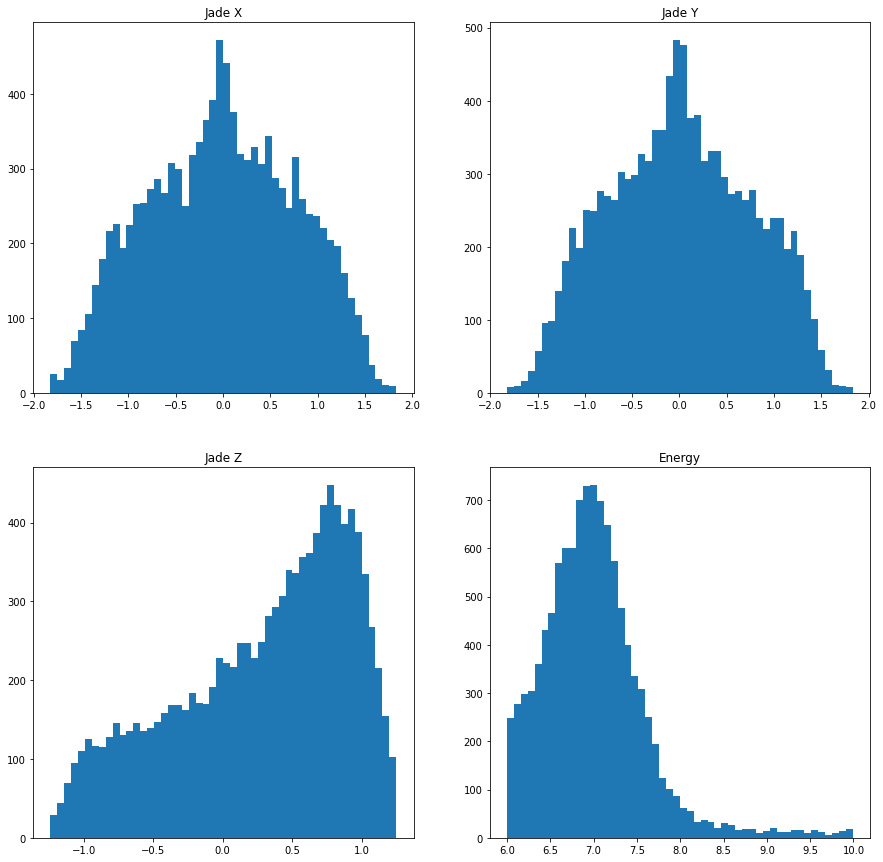

In [30]:
plt.hist2d(np.array(x_all)[selec],np.array(y_all)[selec],bins=[20,20], range=[[-1.6,1.6],[-1.6,1.6]],norm = LogNorm())
plt.colorbar()
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.show()


plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(2,2,1)
plt.hist(np.array(x_all)[selec],bins=50)
plt.title('Jade X')
# plt.show()
plt.subplot(2,2,2)
plt.hist(np.array(y_all)[selec],bins=50)
plt.title('Jade Y')
# plt.show()
plt.subplot(2,2,3)
plt.hist(np.array(z_all)[selec],bins=50)
plt.title('Jade Z')
# plt.show()
plt.subplot(2,2,4)
plt.hist(np.array(energy_all)[selec],bins=50)
plt.title('Energy')
plt.show()